<a href="https://colab.research.google.com/github/Krazy-68/SentimentTrackr/blob/main/Twitter_Analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 9.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=419b543488a3febaa2eee58f2cf847e964225288022ce356e1e8ddc832a237ce
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 6.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-n

In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import nltk
nltk.download('vader_lexicon')

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
consumerKey = "we0Drpnvc1FZNazKkiKoFWlGf"
consumerSecret = "OXRvmJwM6ca9k90XMIMoktSCa5XvjNieqJivcfjbOAlmpO6RhH"
accessToken = "501682241-ZG1DshytyxUIUY8FXPoH2AXaDG9d5DQlORemfAzU"
accessTokenSecret = "mxwCYkDjgWG5qWy8ONtVs3j2lxiYSxyberVVa92jmd27z"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:

    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid
Please enter how many tweets to analyze: 2000


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  545
negative number:  608
neutral number:  847


In [ ]:
tweet_list

,0
0,RT @StatesPoll: What is Your Covid 19 Vax Status?
1,RT @_2019_nCoV: Analyse microscopique en champ...
2,@JustinTrudeau Nobody should be threatened of ...
3,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...
4,RT @Vickyvdtogt: We (the first patients to spe...
...,...
1995,Unusual Toxic Components Found in COVID Vaccin...
1996,RT @Maha_hann: This was the need of the hour. ...
1997,RT @DrexelBritt: “This is the last tool availa...
1998,🚨 Pruebas covid en el Hipódromo


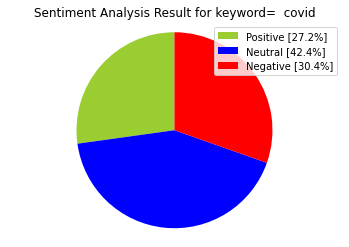

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @StatesPoll: What is Your Covid 19 Vax Status?,RT @StatesPoll: What is Your Covid 19 Vax Status?
1,RT @_2019_nCoV: Analyse microscopique en champ...,RT @_2019_nCoV: Analyse microscopique en champ...
2,@JustinTrudeau Nobody should be threatened of ...,@JustinTrudeau Nobody should be threatened of ...
3,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...
4,RT @Vickyvdtogt: We (the first patients to spe...,RT @Vickyvdtogt: We (the first patients to spe...
...,...,...
1995,Unusual Toxic Components Found in COVID Vaccin...,Unusual Toxic Components Found in COVID Vaccin...
1996,RT @Maha_hann: This was the need of the hour. ...,RT @Maha_hann: This was the need of the hour. ...
1997,RT @DrexelBritt: “This is the last tool availa...,RT @DrexelBritt: “This is the last tool availa...
1998,🚨 Pruebas covid en el Hipódromo,🚨 Pruebas covid en el Hipódromo


In [ ]:
tweet_list

,0,text
0,RT @StatesPoll: What is Your Covid 19 Vax Status?,RT @StatesPoll: What is Your Covid 19 Vax Status?
1,RT @_2019_nCoV: Analyse microscopique en champ...,RT @_2019_nCoV: Analyse microscopique en champ...
2,@JustinTrudeau Nobody should be threatened of ...,@JustinTrudeau Nobody should be threatened of ...
3,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...
4,RT @Vickyvdtogt: We (the first patients to spe...,RT @Vickyvdtogt: We (the first patients to spe...
...,...,...
1995,Unusual Toxic Components Found in COVID Vaccin...,Unusual Toxic Components Found in COVID Vaccin...
1996,RT @Maha_hann: This was the need of the hour. ...,RT @Maha_hann: This was the need of the hour. ...
1997,RT @DrexelBritt: “This is the last tool availa...,RT @DrexelBritt: “This is the last tool availa...
1998,🚨 Pruebas covid en el Hipódromo,🚨 Pruebas covid en el Hipódromo


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @StatesPoll: What is Your Covid 19 Vax Status?,what is your covid 19 vax status
1,RT @_2019_nCoV: Analyse microscopique en champ...,analyse microscopique en champ sombre sur le ...
2,@JustinTrudeau Nobody should be threatened of ...,nobody should be threatened of losing their ...
3,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...,klasse a virus covid 19 was al aan d...
4,RT @Vickyvdtogt: We (the first patients to spe...,we the first patients to speak out were cal...
5,RT @the_meghaning: Rebekah Jones just won her ...,rebekah jones just won her primary for florid...
6,RT @Dominiquetaegon: Rishi Sunak has come out ...,rishi sunak has come out and said that the sc...
7,After so many months of tracking Covid statist...,after so many months of tracking covid statist...
8,RT @TheRickyDavila: I seem to remember Steven ...,i seem to remember steven mnuchin funneling ...
9,RT @funesbeto: El titular de la DAIA Jorge Kno...,el titular de la daia jorge knoblovits asegur...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @StatesPoll: What is Your Covid 19 Vax Status?,what is your covid 19 vax status,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @_2019_nCoV: Analyse microscopique en champ...,analyse microscopique en champ sombre sur le ...,0.000,0.000000,positive,0.107,0.748,0.145,0.2023
2,@JustinTrudeau Nobody should be threatened of ...,nobody should be threatened of losing their ...,0.000,0.000000,negative,0.273,0.634,0.093,-0.5719
3,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...,klasse a virus covid 19 was al aan d...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @Vickyvdtogt: We (the first patients to spe...,we the first patients to speak out were cal...,-0.125,0.616667,negative,0.207,0.793,0.000,-0.5719
5,RT @the_meghaning: Rebekah Jones just won her ...,rebekah jones just won her primary for florid...,0.400,0.500000,positive,0.148,0.700,0.152,0.0258
6,RT @Dominiquetaegon: Rishi Sunak has come out ...,rishi sunak has come out and said that the sc...,0.200,0.200000,neutral,0.000,1.000,0.000,0.0000
7,After so many months of tracking Covid statist...,after so many months of tracking covid statist...,0.400,0.350000,positive,0.000,0.837,0.163,0.5106
8,RT @TheRickyDavila: I seem to remember Steven ...,i seem to remember steven mnuchin funneling ...,0.000,0.000000,positive,0.049,0.708,0.243,0.6597
9,RT @funesbeto: El titular de la DAIA Jorge Kno...,el titular de la daia jorge knoblovits asegur...,0.100,0.100000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,579,45.38
negative,393,30.80
positive,304,23.82


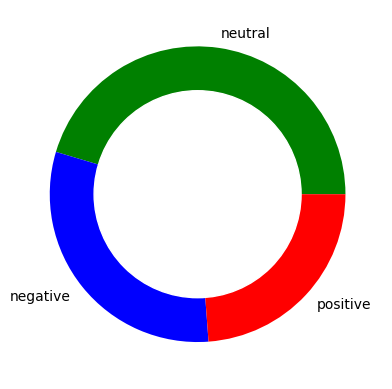

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


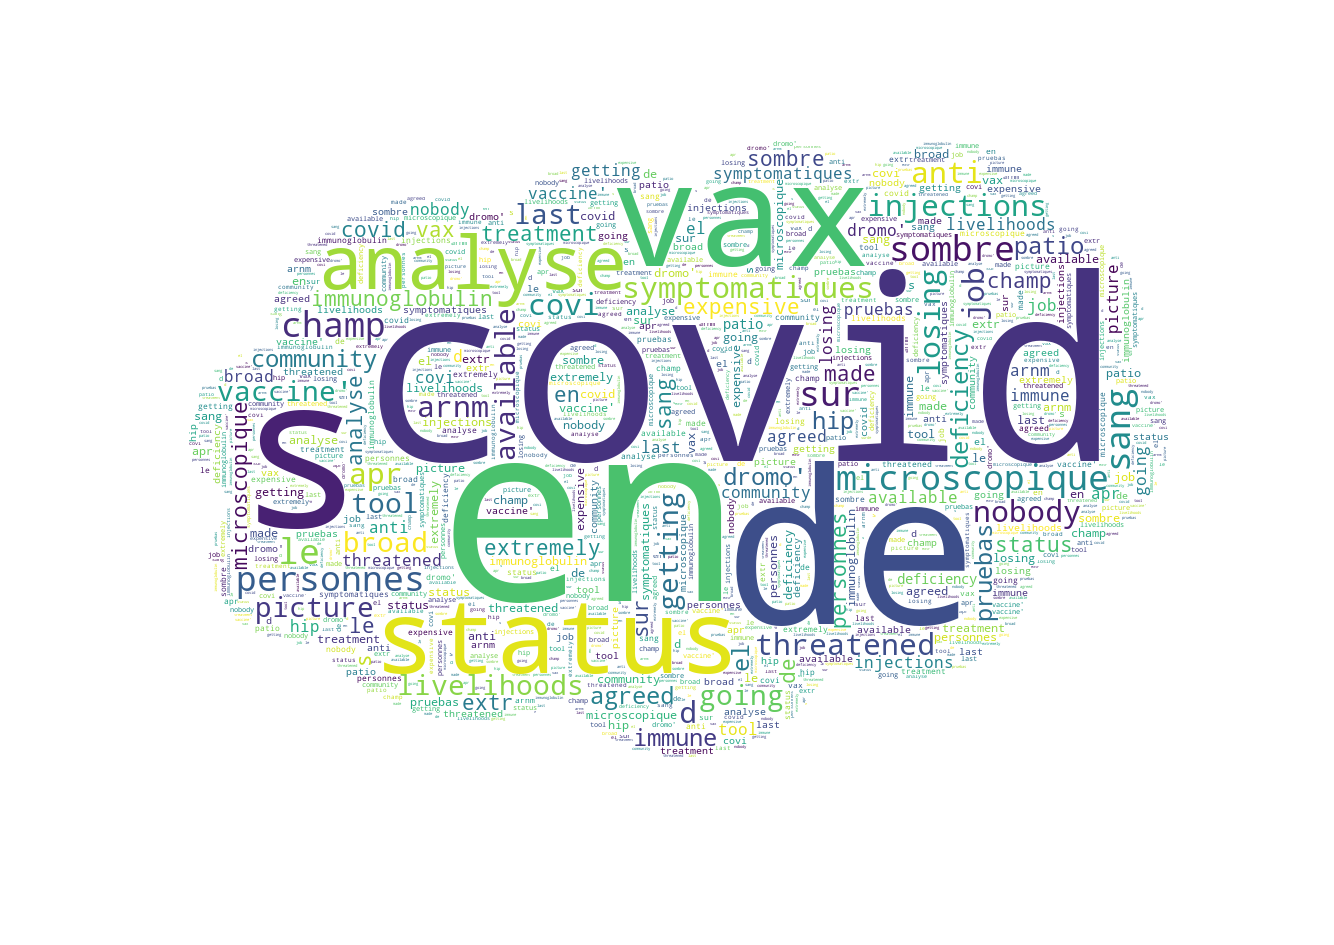

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


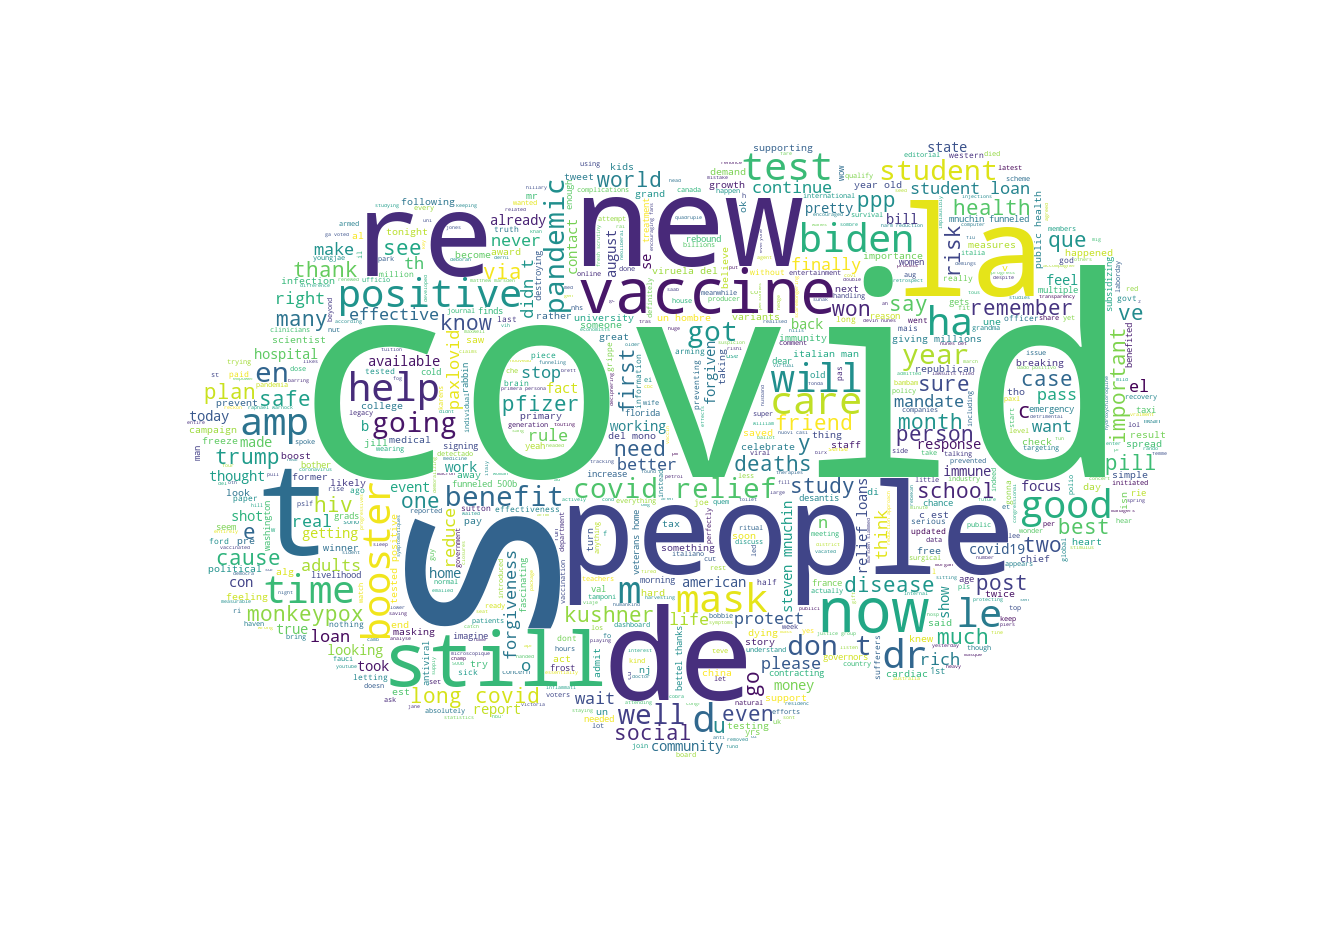

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


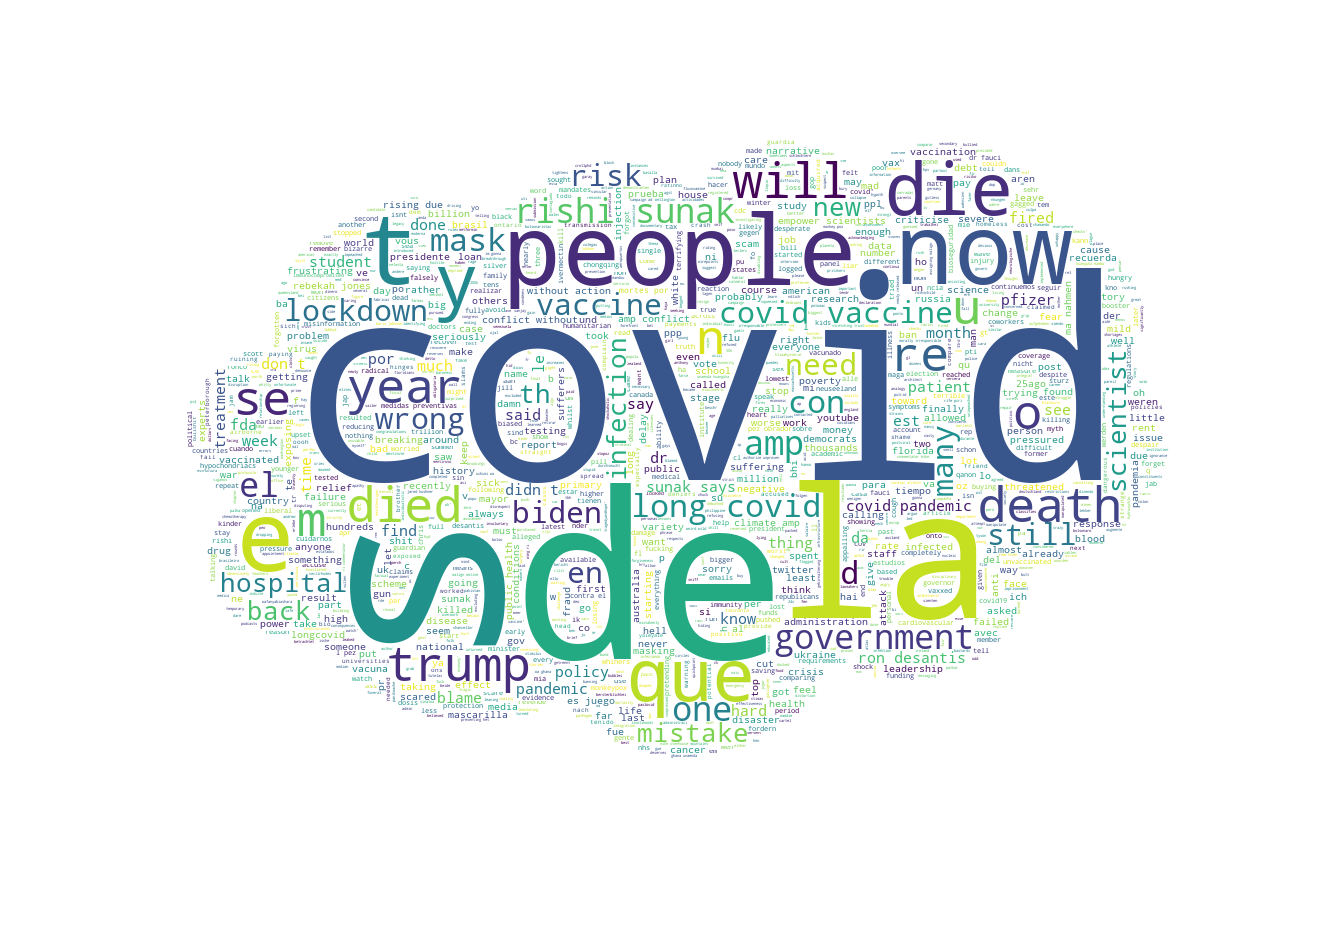

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


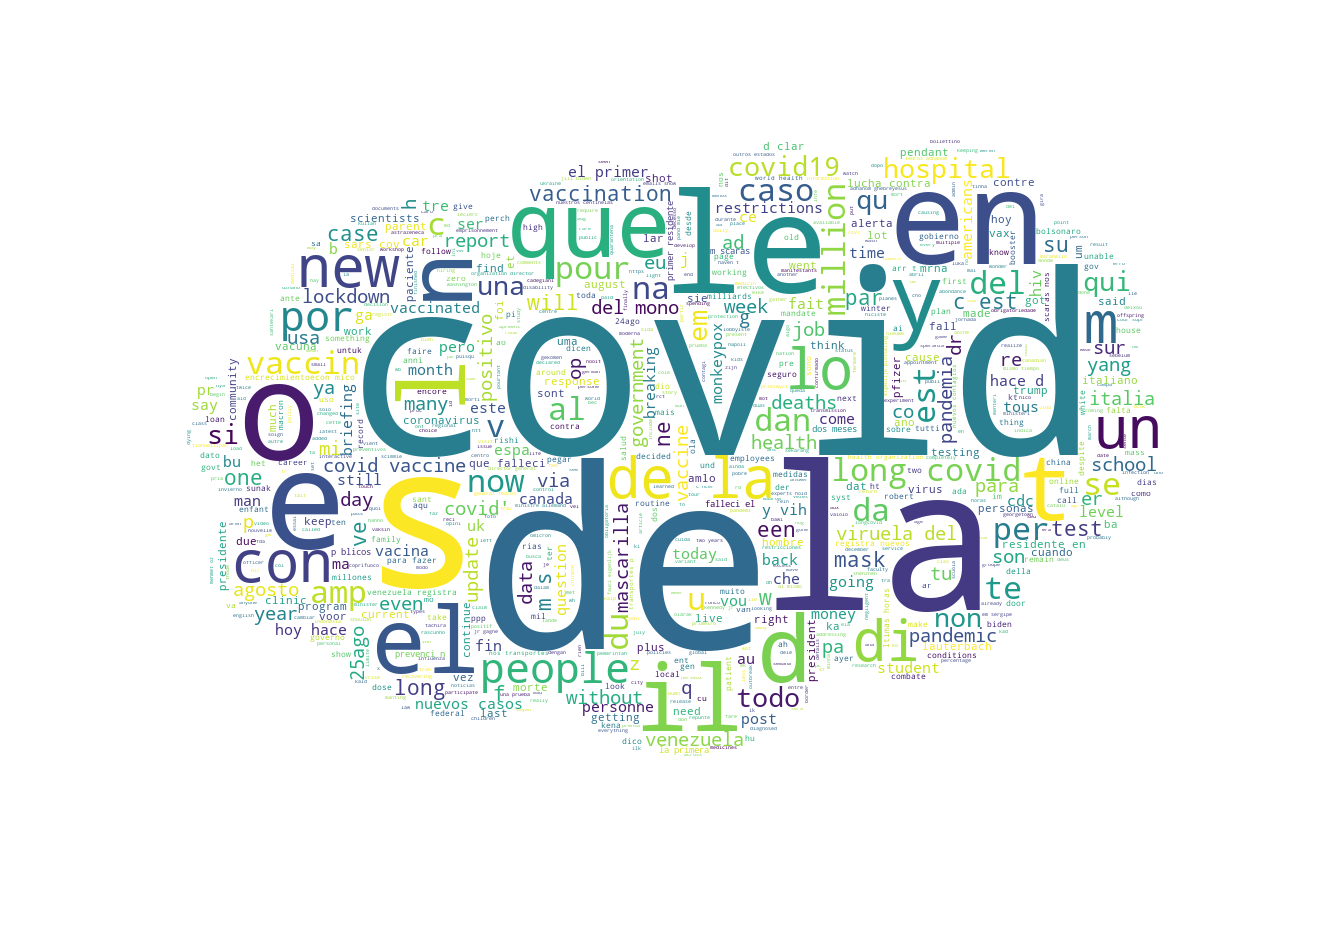

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,107.94
neutral,96.87
positive,105.11


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.64
neutral,15.83
positive,18.12


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @StatesPoll: What is Your Covid 19 Vax Status?,what is your covid 19 vax status,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000,34,7,what is your covid vax status,"[, what, is, your, covid, vax, status, ]","[, covid, vax, status, ]","[, covid, vax, statu, ]"
1,RT @_2019_nCoV: Analyse microscopique en champ...,analyse microscopique en champ sombre sur le ...,0.000,0.000000,positive,0.107,0.748,0.145,0.2023,125,21,analyse microscopique en champ sombre sur le ...,"[, analyse, microscopique, en, champ, sombre, ...","[, analyse, microscopique, en, champ, sombre, ...","[, analys, microscopiqu, en, champ, sombr, sur..."
2,@JustinTrudeau Nobody should be threatened of ...,nobody should be threatened of losing their ...,0.000,0.000000,negative,0.273,0.634,0.093,-0.5719,98,16,nobody should be threatened of losing their ...,"[, nobody, should, be, threatened, of, losing,...","[, nobody, threatened, losing, job, livelihood...","[, nobodi, threaten, lose, job, livelihood, ge..."
3,@dibbeke1 @sennie76 @AlmaTostmann Klasse A vir...,klasse a virus covid 19 was al aan d...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000,90,17,klasse a virus covid was al aan de ...,"[, klasse, a, virus, covid, was, al, aan, de, ...","[, klasse, virus, covid, al, aan, de, lijst, t...","[, klass, viru, covid, al, aan, de, lijst, toe..."
4,RT @Vickyvdtogt: We (the first patients to spe...,we the first patients to speak out were cal...,-0.125,0.616667,negative,0.207,0.793,0.000,-0.5719,123,20,we the first patients to speak out were cal...,"[, we, the, first, patients, to, speak, out, w...","[, first, patients, speak, called, hypochondri...","[, first, patient, speak, call, hypochondriac,..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1276 Number of reviews has 5272 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aa,aad,aan,aangesproken,aangetoond,ab,aba,abandon,abandonn,...,zmniejsza,zo,zonder,zorunda,zrobiono,zu,zugelassenen,zum,zur,zwar
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
covid,886
de,267
la,185
vaccin,95
que,89
le,88
en,83
el,83
peopl,83
n,81


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('covid 19', 193),
 ('long covid', 42),
 ('la covid', 17),
 ('rishi sunak', 16),
 ('covid vaccines', 14),
 ('el covid', 13),
 ('le covid', 13),
 ('por covid', 12),
 ('covid pandemic', 12),
 ('del covid', 10),
 ('viruela del', 10),
 ('del mono', 10),
 ('sunak says', 10),
 ('covid relief', 9),
 ('post covid', 9),
 ('died covid', 9),
 ('ron desantis', 8),
 ('en el', 8),
 ('public health', 8),
 ('empower scientists', 8)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('la covid 19', 12),
 ('viruela del mono', 10),
 ('empower scientists covid', 8),
 ('covid 19 pandemic', 7),
 ('sunak says mistake', 7),
 ('says mistake empower', 7),
 ('mistake empower scientists', 7),
 ('scientists covid pandemic', 7),
 ('covid 19 vaccine', 6),
 ('el covid 19', 5),
 ('covid 19 en', 5),
 ('covid 19 es', 5),
 ('por covid 19', 5),
 ('poverty rising covid', 5),
 ('rising covid climate', 5),
 ('covid climate amp', 5),
 ('climate amp conflict', 5),
 ('amp conflict action', 5),
 ('conflict action th', 5),
 ('contra la covid', 5)]